In [16]:
import pandas as pd
!kaggle datasets download -d ahsen1330/us-police-shootings
!unzip us-police-shootings.zip -d data/
# Load the dataset


file_path = "/content/data/shootings.csv"
time_series_df = pd.read_csv(file_path)

# Preview dataset
print(time_series_df.head())
print(time_series_df.info())


Dataset URL: https://www.kaggle.com/datasets/ahsen1330/us-police-shootings
License(s): other
us-police-shootings.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  us-police-shootings.zip
replace data/shootings.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: data/shootings.csv      
   id                name        date   manner_of_death       armed   age  \
0   3          Tim Elliot  2015-01-02              shot         gun  53.0   
1   4    Lewis Lee Lembke  2015-01-02              shot         gun  47.0   
2   5  John Paul Quintero  2015-01-03  shot and Tasered     unarmed  23.0   
3   8     Matthew Hoffman  2015-01-04              shot  toy weapon  32.0   
4   9   Michael Rodriguez  2015-01-04              shot    nail gun  39.0   

  gender      race           city state  signs_of_mental_illness threat_level  \
0      M     Asian        Shelton    WA                     True       attack   
1      M     White          Aloha  

In [17]:
# Convert the 'date' column to datetime format
time_series_df['date'] = pd.to_datetime(time_series_df['date'], errors='coerce')

# Check for invalid dates
invalid_dates = time_series_df[time_series_df['date'].isna()]
print("Invalid dates:\n", invalid_dates)

# Drop rows with invalid dates if any
time_series_df = time_series_df.dropna(subset=['date'])


Invalid dates:
 Empty DataFrame
Columns: [id, name, date, manner_of_death, armed, age, gender, race, city, state, signs_of_mental_illness, threat_level, flee, body_camera, arms_category]
Index: []


In [18]:
# Set 'date' as the index
time_series_df.set_index('date', inplace=True)

# Verify index type
print(time_series_df.index)


DatetimeIndex(['2015-01-02', '2015-01-02', '2015-01-03', '2015-01-04',
               '2015-01-04', '2015-01-04', '2015-01-05', '2015-01-06',
               '2015-01-06', '2015-01-06',
               ...
               '2020-06-07', '2020-06-09', '2020-06-11', '2020-06-11',
               '2020-06-11', '2020-06-12', '2020-06-12', '2020-06-13',
               '2020-06-13', '2020-06-15'],
              dtype='datetime64[ns]', name='date', length=4895, freq=None)


In [19]:
import matplotlib.pyplot as plt

# Resample data to count shootings per day
daily_shootings_df = time_series_df.resample('D').size().reset_index(name='daily_shootings')

# Preview the resampled data
print(daily_shootings_df.head())


        date  daily_shootings
0 2015-01-02                2
1 2015-01-03                1
2 2015-01-04                3
3 2015-01-05                1
4 2015-01-06                4


In [20]:
# Fill missing dates with 0 shootings
daily_shootings_df.set_index('date', inplace=True)
daily_shootings_df = daily_shootings_df.asfreq('D').fillna(0)

# Verify no missing values remain
print(daily_shootings_df.isnull().sum())


daily_shootings    0
dtype: int64


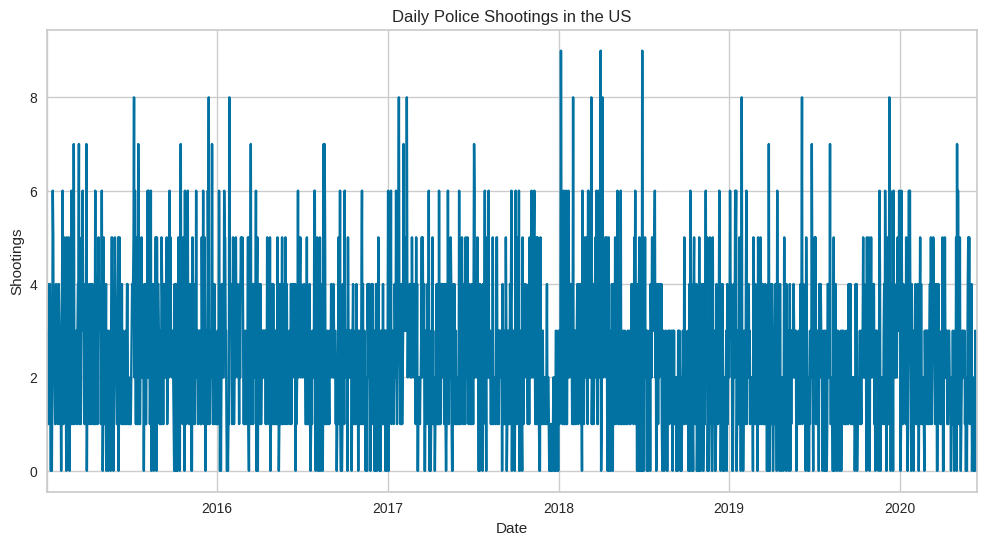

In [21]:
import matplotlib.pyplot as plt

# Plot daily shootings
daily_shootings_df['daily_shootings'].plot(figsize=(12, 6), title="Daily Police Shootings in the US", xlabel="Date", ylabel="Shootings")
plt.show()


In [22]:
# Add time-based features
##daily_shootings_df['month'] = daily_shootings_df.index.month
#daily_shootings_df['day_of_week'] = daily_shootings_df.index.dayofweek
#daily_shootings_df['is_weekend'] = (daily_shootings_df['day_of_week'] >= 5).astype(int)

# Preview enriched data
print(daily_shootings_df.head())


            daily_shootings
date                       
2015-01-02                2
2015-01-03                1
2015-01-04                3
2015-01-05                1
2015-01-06                4


In [8]:
!pip install pycaret


In [24]:
from pycaret.time_series import *
#weekly_shootings_df = daily_shootings_df.resample('W').sum()

#monthly_shootings_df = daily_shootings_df.resample('M').sum()

subset_df = daily_shootings_df.tail(200)

# Set up PyCaret environment
exp = setup(data=subset_df, target='daily_shootings', session_id=42, fh=7)

# Compare models
best_model = compare_models(exclude=['knn', 'en', 'par'])

# Train the model without exogenous variables
final_model = create_model('arima')


save_model(final_model, 'police_shootings_time_series_model')




,Description,Value
0,session_id,42
1,Target,daily_shootings
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(200, 1)"
5,Transformed data shape,"(200, 1)"
6,Transformed train set shape,"(193, 1)"
7,Transformed test set shape,"(7, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.7047,0.6954,1.2088,1.5103,1616262346235729.2500,0.7300,-0.4738,0.2433
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.7080,0.7319,1.2174,1.5911,481560297430932.8125,0.8984,-0.7134,0.5200
omp_cds_dt,Orthogonal Matching Pursuit w/ Cond. Deseasonalize & Detrending,0.7113,0.6943,1.2206,1.5081,1699770855635262.0000,0.7272,-0.4621,0.2400
ridge_cds_dt,Ridge w/ Cond. Deseasonalize & Detrending,0.7124,0.6974,1.2224,1.5149,1695039365768534.7500,0.7289,-0.4768,0.4367
lr_cds_dt,Linear w/ Cond. Deseasonalize & Detrending,0.7124,0.6974,1.2224,1.5149,1695020382393603.2500,0.7289,-0.4768,0.5300
ets,ETS,0.7131,0.6969,1.2236,1.5137,1692941089715907.7500,0.7292,-0.4715,0.1200
exp_smooth,Exponential Smoothing,0.7134,0.6970,1.2241,1.5140,1693796612026763.2500,0.7294,-0.4721,0.1300
br_cds_dt,Bayesian Ridge w/ Cond. Deseasonalize & Detrending,0.7140,0.6982,1.2252,1.5166,1698906462284043.7500,0.7295,-0.4785,0.2367
llar_cds_dt,Lasso Least Angular Regressor w/ Cond. Deseasonalize & Detrending,0.7143,0.6977,1.2257,1.5155,1700305839684940.7500,0.7294,-0.4748,0.2367
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.7143,0.6977,1.2257,1.5155,1700305839684940.7500,0.7294,-0.4748,0.4133


Processing:   0%|          | 0/105 [00:00<?, ?it/s]

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2020-05-18,0.4999,0.5420,0.8733,1.1912,2554314415362267.5000,0.7341,-0.2875
1,2020-05-25,1.4504,1.2881,2.4665,2.7810,0.7603,1.3943,-3.0316
2,2020-06-01,0.7712,0.7296,1.3245,1.5847,2659682413403849.0000,0.9074,-0.5007
Mean,NaT,0.9072,0.8533,1.5548,1.8523,1737998942922039.2500,1.0119,-1.2733
SD,NaT,0.3998,0.3169,0.6705,0.6761,1229703446079965.7500,0.2795,1.2464


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 ARIMA(seasonal_order=(0,
                                                                                       1,
                                                                                       0,
                                                                                       2)))]))]),
 'police_shootings_time_series_model.pkl')